<a href="https://colab.research.google.com/github/DanayaDiarra/DanayaGsom/blob/master/MultLinReg_Demand_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modeling Demand Function of a Product**

**"Chicken"**

In [42]:
# loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# packages for statistical analysis
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats as stats_m

from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import reset_ramsey

# **1) Uploading and Describing the Data**

# **1.1_ Importing**

In [43]:
data_chicken = pd.read_excel("/content/chicken.xlsx", "data", index_col=None, na_values=["NA"])

In [44]:
data_chicken.head()

,year,qc,inc,pc,pp,pb
0,1960,27.8,397.5,42.2,50.7,78.3
1,1961,29.9,413.3,38.1,52.0,79.2
2,1962,29.8,439.2,40.3,54.0,79.2
3,1963,30.8,459.7,39.5,55.3,79.2
4,1964,31.2,492.9,37.3,54.7,77.4


# **1.2_ Descriptive Analysis**

In [45]:
# Computing basic descriptive stats
data_chicken.describe().round(2)

,year,qc,inc,pc,pp,pb
count,23.00,23.00,23.00,23.00,23.00,23.00
mean,1971.00,39.67,1035.07,48.00,90.40,124.43
std,6.78,7.37,617.85,11.12,35.22,51.50
min,1960.00,27.80,397.50,37.30,50.70,77.40
25%,1965.50,34.45,544.45,38.95,64.10,80.30
50%,1971.00,40.30,843.30,40.30,73.20,106.10
75%,1976.50,43.40,1399.50,58.10,125.75,143.25
max,1982.00,52.90,2478.70,70.40,168.20,232.60


# **1.3_ Graphical Analysis: Individual Time-Series graphs**

In [46]:
def myTSplot(x, label=None):
  plt.figure()
  data_chicken[x].plot()
  plt.title("Plot of " +label)
  plt.xticks(range(23), data_chicken["year"], rotation= "vertical")
  plt.grid()

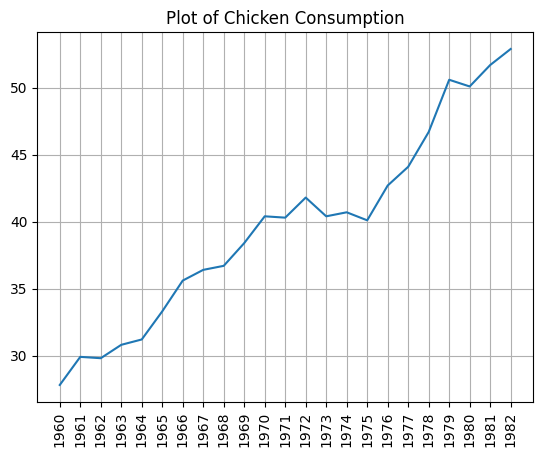

In [47]:
#Plot of Chicken Consumption
myTSplot("qc", "Chicken Consumption")

The graph(QC) has an "Upcoming Linear" trend.

The consumption per-capital broke("dump") in 1973-1975  

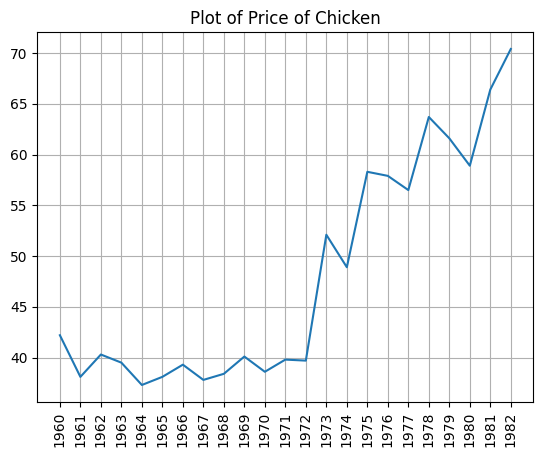

In [48]:
#Plot of Price of Chicken
myTSplot("pc", "Price of Chicken")

The Graph (PC) has an upcoming non-linear trend(Piece-wise linear).

In 1973 while the price of chicken became higher, the consumption dropped for 3 years.

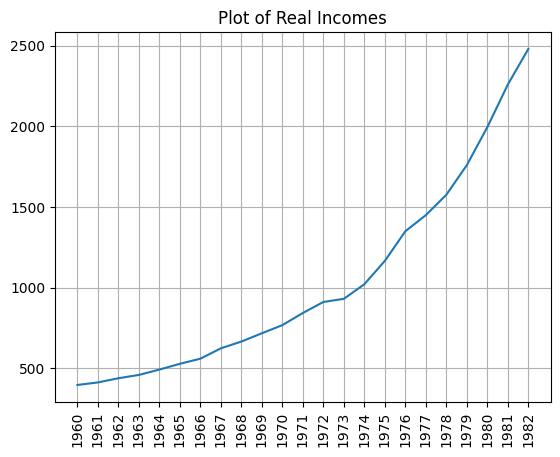

In [49]:
#Plot of real incomes
myTSplot("inc", "Real Incomes")

The Graph(Real Incomes) shows a non-linear(Exponential) trend(growth).
It's the most important factor that allows people to buy chicken

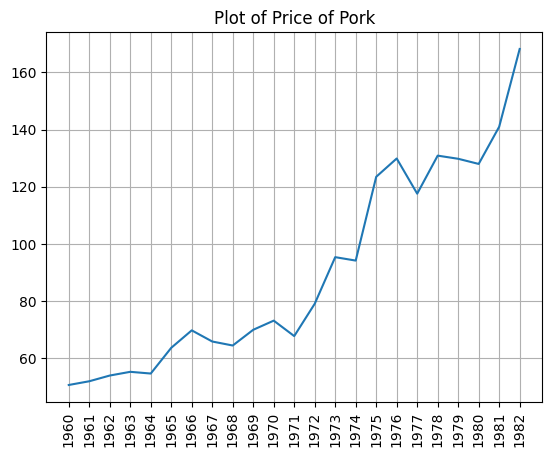

In [50]:
#Plot of Price of Pork
myTSplot("pp", "Price of Pork")

The graph(Price of Pork) shows an exponential trend. No significant break

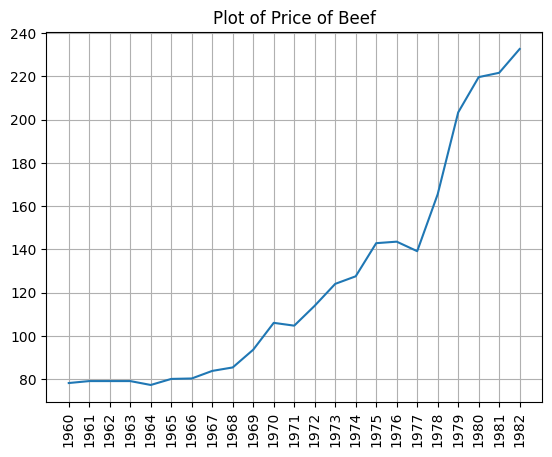

In [51]:
#Plot of Price of Beef
myTSplot("pb", "Price of Beef")

Non-linear upcoming trend

# **2) Paire-Wise Analysis** : Scatter plot

In [52]:
# Extracting QC and PC
qc = data_chicken[ "qc" ]
pc = data_chicken["pc"]

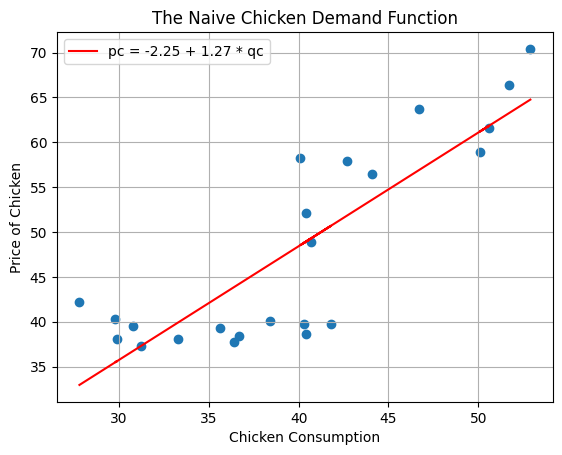

In [53]:
#Scatter plot for QC and PC
plt.figure()
plt.scatter(qc, pc)
plt.xlabel("Chicken Consumption")
plt.ylabel("Price of Chicken")
plt.title("The Naive Chicken Demand Function")
plt.grid()

#Regression Part
slopeY, interceptY,_,_,_ = stats.linregress(qc, pc)
lineY = slopeY * qc + interceptY
plt.plot(qc, lineY, "r", label = 'pc = {:.2f} + {:.2f} * qc'.format(interceptY, slopeY))
plt.legend()



For every additional increase of **1 pounds** per capita consumption of chicken(QC), the price of chicken(PC) increases by **1.27 cents**

In [54]:
# run a pair-wise correlation analysis
Coefpears, PVpears = stats.pearsonr(qc, pc)
print("Pearson's correlation coefficient: ", round(Coefpears, 4))
print("Pearson's Correlation P-Value: ", round(PVpears, 4))

Pearson's correlation coefficient:  0.84
Pearson's Correlation P-Value:  0.0


The Pearson's correlation coefficient indicates a strong positive linear relationship between the two variables.
As the Consumption of chicken increases(QC), the price (PC) tend to increase as well.

P-Value: 0.0

H0: There is no correlation

H1: Correlation is present

PV 0.0 < 0.05 => Indicates a strong evidence against H0.
We reject the null hypothesis
We can be very confident that the observed correlation is not due to random chance.

# **3) Linear regression Analysis**


# **3.1_ Model1: MultiVariate Linear regression**

In [55]:
#Model1 estimation
model1 = ols("qc ~ pc + inc + pp + pb", data_chicken).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     qc   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     73.87
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           6.43e-11
Time:                        19:07:30   Log-Likelihood:                -45.214
No. Observations:                  23   AIC:                             100.4
Df Residuals:                      18   BIC:                             106.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.2324      3.718     10.015      0.000      29.422      45.043
pc            -0.6112      0.163     -3.753      0.001      -0.953      -0.269
inc            0.0050      0.005      1.024      0.319      -0.005       0.015
pp             0.1984      0.064      3.114      0.006       0.065       0.332
pb             0.0695      0.051      1.363      0.190      -0.038       0.177
==============================================================================
Omnibus:                        2.004   Durbin-Watson:                   1.065
Prob(Omnibus):                  0.367   Jarque-Bera (JB):                1.088
Skew:                           0.098   Prob(JB):                        0.580
Kurtosis:                       1.953   Cond. No.                     1.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Model Summary**
**Dependent Variable (Dep. Variable):** **qc** - The variable we're trying to predict.


---


**R-squared: 0.943**
- Indicates that approximately 94.3% of the variance in the dependent variable **qc** can be explained by the **independent variables** in the model.

 This suggests a very good fit.


---


**Adjusted R-squared: 0.930**
- Adjusted for the number of predictors in the model, this value is slightly lower but still indicates a strong fit.


---


**F-statistic: 73.87**
- Tests the overall significance of the model. A high value suggests that at least one predictor variable is significantly related to the dependent variable.


---


**Prob (F-statistic): 6.43e-11**
- The p-value associated with the F-statistic, indicating that the model is statistically significant (p < 0.05).



---

##  **Model Fit Statistics**

**Log-Likelihood: -45.214**
- A measure of the likelihood of the model; higher values (closer to zero) indicate a better fit.

**AIC (Akaike Information Criterion): 100.4**
- A measure for model selection; lower values suggest a better model.

**BIC (Bayesian Information Criterion): 106.1**
- Similar to AIC but includes a penalty for the number of parameters.



---

#**Coefficients**

**Intercept:**
* The expected value of **qc** when all predictors are zero.

**pc:**

 * The negative coefficient indicates that as **pc increases**, **qc decreases**.
 This relationship is statistically significant (p = 0.001).

**inc:**
* The coefficient is not statistically significant (p = 0.319), suggesting that income does not have a meaningful impact on qc.

**pp:**
* A positive coefficient, statistically significant (p = 0.006), indicating that as **pp** increases, **qc** also increases.

**pb:**
* The coefficient is not statistically significant (p = 0.190), indicating no strong evidence of an effect on qc.



---

# Additional Statistics
**Omnibus: 2.004** - A test for the normality of residuals.

**Prob(Omnibus): 0.367** - p-value for the Omnibus test, suggesting that the residuals are normally distributed.

**Durbin-Watson: 1.065** - A test for autocorrelation in the residuals; values closer to 2 suggest no autocorrelation.

**Skew: 0.098** - Indicates the symmetry of the distribution of residuals.

**Kurtosis: 1.953** - Indicates the "tailedness" of the distribution; values close to 3 suggest a normal distribution.

**Cond. No.: 1.11e+04** - A measure of multicollinearity; higher values indicate potential issues.

# **3.2_ Model1: Tests of Disturbances**

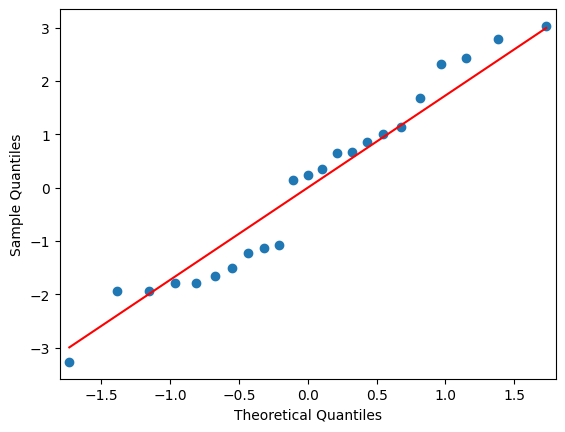

In [56]:
#Store model residuals
resids1 = model1.resid

#Visual Normality Test
qqplot(resids1, line= "s");

In [57]:
# Jarque-Bera test results are in the summary of Model 1

Prob(JB):

Value: 0.580
This represents the p-value associated with the Jarque-Bera test. A high p-value (commonly above 0.05) indicates that we do not reject the null hypothesis, which suggests that the data may come from a normal distribution. In this case, a p-value of 0.580 implies there is not enough evidence to claim that the distribution significantly differs from normality.

In [58]:
# The Breusch_Pagan Heteroskedasticity Test
BPtest =  pd.DataFrame(stats_m.diagnostic.het_breuschpagan(resids1, model1.model.exog), columns=["value"],
                    index = ["Chi^2 Test Statistic", "Chi^2 Test P-Value", "F-Test statistic", "F-test P-Value"])
print("\n ----------The Breusch Pagan Test----------")
print(BPtest)


 ----------The Breusch Pagan Test----------
                         value
Chi^2 Test Statistic  6.428253
Chi^2 Test P-Value    0.169368
F-Test statistic      1.745570
F-test P-Value        0.183967


H0: There is no Heteroskedasticity

H1: Heteroskedasticity is present


---



**Chi^2 Test---------------**

P-Value: 0.16 > 0.05   
So we fail to reject the null hypothesis.
We don't have strong evidence to state that hesk is present


**F-Test--------------------**

P-Value: 0.18 > 0.05

We lack stron evidence against the null hypothesis


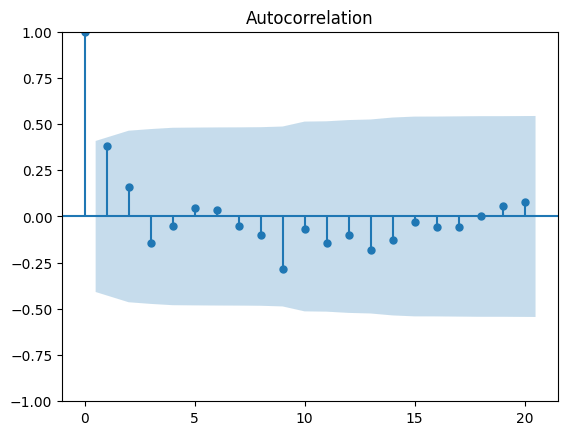

In [59]:
# Graphical Autocorrelation Test    #ACF: autocorrelation function
acf = smt.graphics.plot_acf(resids1, lags= 20, alpha = 0.05)
acf.show()


In [60]:
# The Breusch-Godfrey autocorrelation test
BG_test = pd.DataFrame(stats_m.diagnostic.acorr_breusch_godfrey(model1, nlags= 1), columns=["value"],
                       index=["Chi^2 Test statistic", "Chi^2 Test P-Value", "F-test Statistic ", "F-test P-value"])
print("\n ----------The Breusch-Godfrey Test----------")
print(BG_test)


 ----------The Breusch-Godfrey Test----------
                         value
Chi^2 Test statistic  7.694995
Chi^2 Test P-Value    0.005537
F-test Statistic      8.547198
F-test P-value        0.009477


H0: No autocorrelation

H1: Autocorrelation is present

---
Chi^2

P-Value: 0.005 < 0.05 We reject the null hypothesis(HO). We don't possess anought evidence to conclude that there is no autocorrelation

F-Test

P-value: 0.009 < 0.05 We don't have anought evidence against H1.  So there is autocorrelation



# **3.3_ Tests of the Specification of the model1**

In [61]:
# discuss the goodness-of-fit of the model

In [62]:
# The RESET(Regression Equation Specification Error Test) #test
reset1 = reset_ramsey(model1, degree= 3)
print(reset1)

<F test: F=19.806189707008627, p=4.6944859622209464e-05, df_denom=16, df_num=2>


The RESET test checks for omitted variables, incorrect functional forms, or suboptimal choices of predictors in a regression model. If the model is misspecified, it could lead to biased or inconsistent estimates.

In [63]:
data_chicken.head()

,year,qc,inc,pc,pp,pb
0,1960,27.8,397.5,42.2,50.7,78.3
1,1961,29.9,413.3,38.1,52.0,79.2
2,1962,29.8,439.2,40.3,54.0,79.2
3,1963,30.8,459.7,39.5,55.3,79.2
4,1964,31.2,492.9,37.3,54.7,77.4


In [64]:
# Multicollinearity Test
#VIF(Variance Inflation Factor)
dfXX = data_chicken.drop(["year", "qc"], axis= 1)

dfVIFs = pd.DataFrame()
dfVIFs["Regressor"] = dfXX.columns
dfVIFs["VIFs"] = np.linalg.inv(dfXX.corr().to_numpy()).diagonal().round(2)
dfVIFs

,Regressor,VIFs
0,inc,52.70
1,pc,18.90
2,pp,29.05
3,pb,39.76


**VIF < 5:** Generally indicates low or acceptable multicollinearity.

**VIF between 5 and 10:** Suggests moderate multicollinearity; may warrant further investigation.

**VIF > 10:** Indicates high multicollinearity, which can severely affect the regression analysis and interpretation of coefficients.

In [65]:
# Correlation analysis
data_chicken.corr().round(3)

,year,qc,inc,pc,pp,pb
year,1.000,0.978,0.939,0.883,0.947,0.923
qc,0.978,1.000,0.947,0.840,0.912,0.935
inc,0.939,0.947,1.000,0.932,0.957,0.986
pc,0.883,0.840,0.932,1.000,0.970,0.928
pp,0.947,0.912,0.957,0.970,1.000,0.941
pb,0.923,0.935,0.986,0.928,0.941,1.000


**Correlation** measures the strength and direction of a linear relationship between two variables. It ranges from -1 to 1:
* 1 indicates a perfect positive linear correlation.
* -1 indicates a perfect negative linear correlation.
* 0 indicates no linear correlation.


---
The correlation between **"inc"** and **"pb"** is **0.986**, indicating a **very strong positive relationship**.

**Consistency Across Variables:**

* All the variables show strong correlations with each other, with the **lowest** being the correlation between **"qc"** and **"pc" (0.840)**. This still indicates a significant relationship, although less strong.

**Self-Correlation:**

* The diagonal values (where a variable is correlated with itself) are all **1.000**, which is expected.


# **3.4_ Tests of the Coefficients of Model1**

In [66]:
# linear hypotheses test
linHypothesis1 = "(inc = pb), (pb = 0)"
print(model1.f_test(linHypothesis1))

<F test: F=11.83087194823733, p=0.0005245846058752492, df_denom=18, df_num=2>


**H0:** b2 = b4

**H1:** b2^2 + b4^2 > 0

**F-test = 11.83 ~F(...)**
P-Value = 0.0005 < 0.5 We reject the null hypothesis.
They are actually significant as group


# **4) Log-Log Regression Analysis**

In [67]:
# Generating New Regrressors
data_chicken["logqc"] = np.log(data_chicken["qc"])
data_chicken["logpc"] = np.log(data_chicken["pc"])
data_chicken['loginc'] = np.log(data_chicken['inc'])
data_chicken["logpp"] = np.log(data_chicken["pp"])
data_chicken["logpb"] = np.log(data_chicken["pb"])

In [68]:
data_chicken.tail().round(2)

,year,qc,inc,pc,pp,pb,logqc,logpc,loginc,logpp,logpb
18,1978,46.7,1575.5,63.7,130.9,165.5,3.84,4.15,7.36,4.87,5.11
19,1979,50.6,1759.1,61.6,129.8,203.3,3.92,4.12,7.47,4.87,5.31
20,1980,50.1,1994.2,58.9,128.0,219.6,3.91,4.08,7.60,4.85,5.39
21,1981,51.7,2258.1,66.4,141.0,221.6,3.95,4.20,7.72,4.95,5.40
22,1982,52.9,2478.7,70.4,168.2,232.6,3.97,4.25,7.82,5.13,5.45


# **4.1_ Model2: Multivariate logarithmic regression**

In [69]:
# Estimating Model2

model2 = ols("logqc ~ logpc + loginc + logpp + logpb", data_chicken).fit()

In [70]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  logqc   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     249.9
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           1.67e-15
Time:                        19:07:31   Log-Likelihood:                 52.759
No. Observations:                  23   AIC:                            -95.52
Df Residuals:                      18   BIC:                            -89.84
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1898      0.156     14.063      0.000       1.863       2.517
logpc         -0.5046      0.111     -4.550      0.000      -0.738      -0.272
loginc         0.3426      0.083      4.114      0.001       0.168       0.517
logpp          0.1485      0.100      1.490      0.153      -0.061       0.358
logpb          0.0911      0.101      0.905      0.378      -0.120       0.303
==============================================================================
Omnibus:                        1.145   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                1.078
Skew:                           0.427   Prob(JB):                        0.583
Kurtosis:                       2.370   Cond. No.                         388.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **4.2_ Test of Disturbances of Model2**

In [71]:
#Storing the Residuals
resids2 = model2.resid

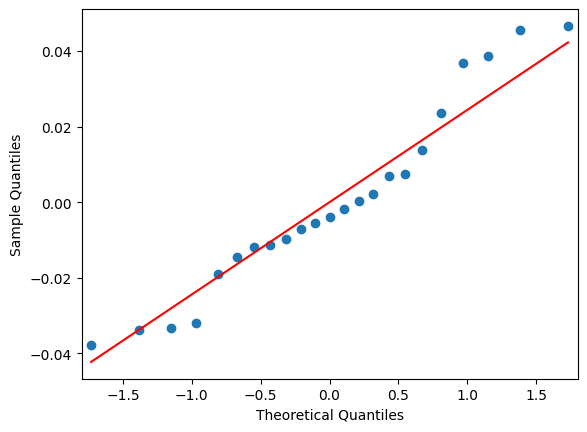

In [72]:
# Visual Normality Test
qqplot(resids2, line="s");

In [73]:
# Jarque-Bera test results are in the summary of the Model

In [74]:
# The Breusch-Pagan heteroskedasticity test
BP_test = pd.DataFrame(stats_m.diagnostic.het_breuschpagan(resids2, model2.model.exog), columns = ["value"],
                       index = ["Chi^2 Test Statistic", "Chi^2 Test P-Value", "F-test Statistic", "F-test P-value"])
print("\n -----------The Breusch-Pagan Test-----------")
print(BP_test)


 -----------The Breusch-Pagan Test-----------
                         value
Chi^2 Test Statistic  5.977008
Chi^2 Test P-Value    0.200872
F-test Statistic      1.580012
F-test P-value        0.222519


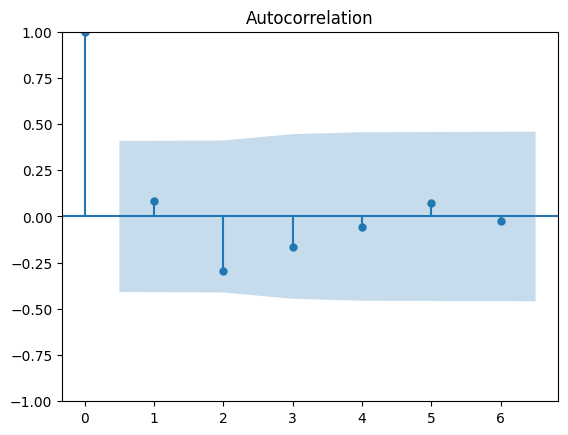

In [75]:
# Graphical Autocorrelation Test
acf = smt.graphics.plot_acf(resids2, lags= 6, alpha= 0.05)

In [76]:
# The Breusch-Godfrey autocorrelation test
BGtest = pd.DataFrame(stats_m.diagnostic.acorr_breusch_godfrey(model2, nlags = 2), columns =["value"],
                      index = ["Chi^2 Test Statistic", "Chi^2 Test P-Value", "F-test Statistic", "F-test P-Value"])
print("\n ---------Breusch-Godfrey A/C Test---------")
print(BGtest)


 ---------Breusch-Godfrey A/C Test---------
                         value
Chi^2 Test Statistic  2.471524
Chi^2 Test P-Value    0.290613
F-test Statistic      0.963159
F-test P-Value        0.402746


Since both the **Chi-squared (0.29)** and **F-test (0.40) p-values** are **greater than 0.05**, we fail to reject the null hypothesis. There is no significant evidence of autocorrelation in the data

# **4.3_ Tests of the specification of model2**

In [77]:
# The RESET test
reset2 = reset_ramsey(model2, degree = 3)
print(reset2)

<F test: F=1.7575340955975705, p=0.2041734540484303, df_denom=16, df_num=2>


In [78]:
# Multicollinearity Test
#VIF Test
dfXXlog = data_chicken.drop(["year","qc", "pc", "inc", "pp", "pb", "logqc"], axis=1)

dfVIFslog = pd.DataFrame()
dfVIFslog["Regressor"] = dfXXlog.columns
dfVIFslog["VIF"] = np.linalg.inv(dfXXlog.corr().to_numpy()).diagonal().round(2)
dfVIFslog

,Regressor,VIF
0,logpc,17.49
1,loginc,65.11
2,logpp,41.43
3,logpb,42.31


In [79]:
# Correlation analysis
dfXXlog.corr().round(3)

,logpc,loginc,logpp,logpb
logpc,1.000,0.907,0.947,0.933
loginc,0.907,1.000,0.972,0.979
logpp,0.947,0.972,1.000,0.954
logpb,0.933,0.979,0.954,1.000


In [82]:
# linear hypotheses test for group (in)significance
linHypothesis2 = '(logpp = logpb), (logpb = 0)'
print(model2.f_test(linHypothesis2))

<F test: F=1.1392446294495204, p=0.3420835357269419, df_denom=18, df_num=2>


F = 1.13 ~ H0 ~ F(...)
P-value = 0.34 > 0.05

We do not reject HO. They're significant as a group

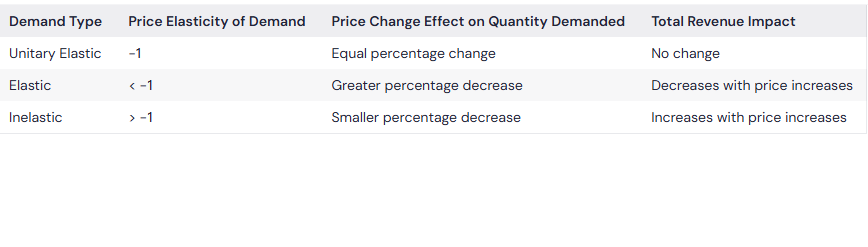

In [83]:
# linear hypotheses test of price elasticity
linHypothesis3 = '(logpc = -1)'
print(model2.f_test(linHypothesis3))

<F test: F=19.957543753413365, p=0.0002976686528111596, df_denom=18, df_num=1>


In [84]:
# linear hypotheses test of income elasticity
linHypothesis4 = '(loginc = 1)p'
print(model2.f_test(linHypothesis4))

<F test: F=62.34191183308974, p=2.9529096381850545e-07, df_denom=18, df_num=1>


H0: B2 = 1

H1: B2 != 1

F = 62.34 ~ HO ~ F(.,.)

P-value = (2.95 * 10^-7) < 0.05  

We reject H0.      
*  1% increase in income does not equal to 1% increase in QC


# **5. Optimized Logarithmic model**

In [85]:
# Estimating Model3
model3 = ols("logqc ~ logpc + loginc", data_chicken).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  logqc   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     491.9
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           9.87e-18
Time:                        22:26:01   Log-Likelihood:                 51.389
No. Observations:                  23   AIC:                            -96.78
Df Residuals:                      20   BIC:                            -93.37
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0328      0.116     17.497      0.000       1.790       2.275
logpc         -0.3722      0.063     -5.865      0.000      -0.505      -0.240
loginc         0.4515      0.025     18.284      0.000       0.400       0.503
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.676
Skew:                           0.634   Prob(JB):                        0.433
Kurtosis:                       2.624   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# comparing with Model 3 with Model 2
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  logqc   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     249.9
Date:                Thu, 09 Jan 2025   Prob (F-statistic):           1.67e-15
Time:                        23:16:39   Log-Likelihood:                 52.759
No. Observations:                  23   AIC:                            -95.52
Df Residuals:                      18   BIC:                            -89.84
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1898      0.156     14.063      0.000       1.863       2.517
logpc         -0.5046      0.111     -4.550      0.000      -0.738      -0.272
loginc         0.3426      0.083      4.114      0.001       0.168       0.517
logpp          0.1485      0.100      1.490      0.153      -0.061       0.358
logpb          0.0911      0.101      0.905      0.378      -0.120       0.303
==============================================================================
Omnibus:                        1.145   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                1.078
Skew:                           0.427   Prob(JB):                        0.583
Kurtosis:                       2.370   Cond. No.                         388.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# **6. Prediction**

Let's say we know that in 1983 the values of our two variables were the following:

- Pc = 69.3
- Inc = 2567.7

In [88]:
# make a data-frame
data_chickennew = pd.DataFrame({"logpc": [np.log(69.3)],
                                "loginc": [np.log(2567.7)]})
data_chickennew

,logpc,loginc
0,4.238445,7.850766


In [89]:
# obtain a forecast
pred = model3.get_prediction(data_chickennew, weights=1).summary_frame(alpha=0.05).round(2)

In [90]:
print(pred)

   mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  obs_ci_upper
0   4.0     0.01           3.97           4.03          3.94          4.06


**Mean (4.0):**

The average predicted value based on model3.

**Mean Standard Error (0.01):**

Indicates how much the mean prediction is likely to vary from the true mean.

**Mean Confidence Interval (3.97 to 4.03):**

There's a 95% confidence that the true mean of the population from which the data comes lies within this range.

**Observation Confidence Interval (3.94 to 4.06):**

For individual predictions, there's a 95% confidence that new observations will fall within this range.